In [1]:
import functools
import itertools
import numpy as np
from pprint import pprint

import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def suggest_indices():
    for _ in range(100):
        inds = np.random.randint(low=0, high=1_000_000, size=2)
        if inds[0] != inds[1]:
            yield inds

In [3]:
pprint(list(suggest_indices()), compact=True)

[array([246183, 369271]), array([319516, 770822]), array([610637, 769434]),
 array([428497, 207308]), array([993253, 911043]), array([156266, 429749]),
 array([384205, 227673]), array([968363,  71426]), array([876558, 706014]),
 array([402969, 552601]), array([433368, 230118]), array([167985, 874826]),
 array([717492, 320747]), array([924730, 736820]), array([ 10171, 740712]),
 array([847840, 425481]), array([ 92343, 173763]), array([ 42804, 631595]),
 array([435553, 189993]), array([458966, 204997]), array([ 36448, 344024]),
 array([516137, 629670]), array([800197, 112766]), array([942254, 547383]),
 array([234825, 280986]), array([712779, 122413]), array([107310, 291626]),
 array([225351, 683714]), array([214277, 245371]), array([699186,  96196]),
 array([ 46784, 336329]), array([970855, 993238]), array([648991,  30967]),
 array([434447, 492292]), array([602593,  13212]), array([442843, 245742]),
 array([107471, 237251]), array([685922, 887981]), array([413296, 921829]),
 array([6474

In [37]:
def draw_graph(G, title):
    nx.draw_circular(G, with_labels=True)
    plt.title(title)
    plt.show()

In [4]:
arrangement = list(range(20))

In [5]:
arrangement

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [54]:
G = nx.DiGraph()

In [70]:
nx.add_cycle(G, arrangement)

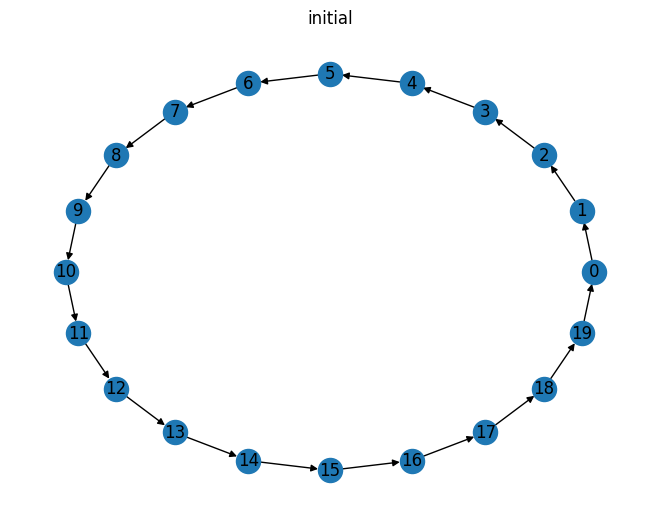

In [71]:
draw_graph(G, "initial")

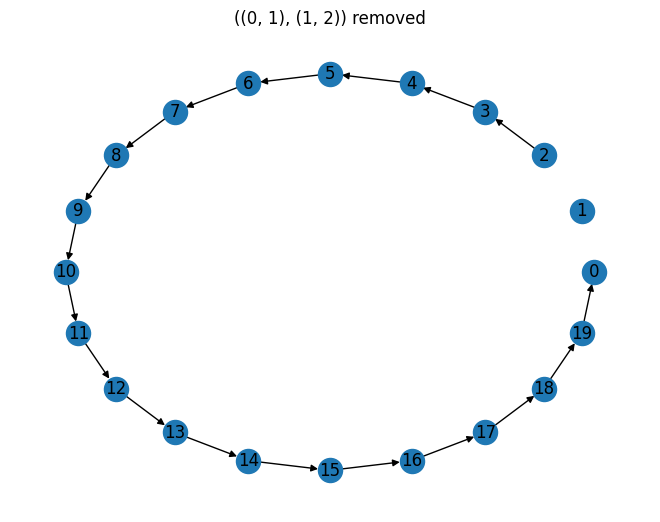

In [72]:
for comb in itertools.islice(itertools.combinations(G.edges(), 2), 1):
    G_temp = G.copy()
    G_temp.remove_edges_from(comb)

    # nodes_to_take_care = set(np.array(comb).flatten())

    # print(nodes_to_take_care)

    # add_back = set()
    
    # for node in nodes_to_take_care:
    #     candidates = set(range(20)) - nodes_to_take_care
    #     chosen = np.random.choice(list(candidates))

    #     pred_chosen = list(G_temp.predecessors(chosen))
        
    #     print(pred_chosen)

    #     G_temp.remove_edges_from((x, chosen) for x in pred_chosen)
        
    #     G_temp.add_edge(node, chosen)

    #     for p in pred_chosen:
    #         add_back.add(p)

    # nodes_with_degree_less_than_2 = [node for node in nodes_to_take_care if G_temp.degree(node) < 2]

    # nodes_with_degree_less_than_2 += [node for node in add_back if G_temp.degree(node) < 2]

    # print(f'{nodes_with_degree_less_than_2=}')

    # while len(nodes_with_degree_less_than_2) >= 2:
    #     node1, node2 = nodes_with_degree_less_than_2[:2]
    #     nodes_with_degree_less_than_2 = nodes_with_degree_less_than_2[2:]
    #     G_temp.add_edge(node1, node2)


    # G_temp2 = nx.Graph(G_temp.edges())

    # G_temp3 = nx.DiGraph(nx.add_cycle(G_temp2.)

    draw_graph(G_temp, f'{comb} removed')

    # print(f'{G_temp.is_connected()}')

In [73]:
def add_edge_and_then_remove_if_necessary(G, source, target):
    prev_predecessor = next(G.predecessors(target), None)
    neighbor = next(G.neighbors(target), None)
    G.add_edge(source, target)
    if prev_predecessor != None and neighbor != None:
        G.remove_edge(prev_predecessor, target)
    return prev_predecessor

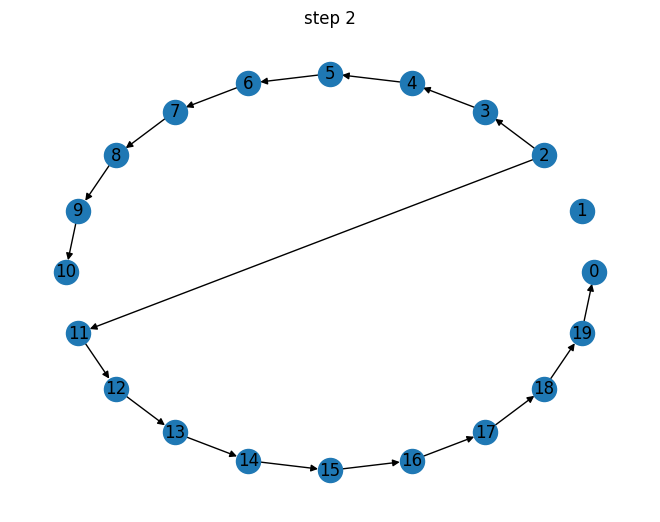

In [74]:
prev_predecessor = add_edge_and_then_remove_if_necessary(G_temp, 2, 11)

assert prev_predecessor == 10

draw_graph(G_temp, f'step 2')

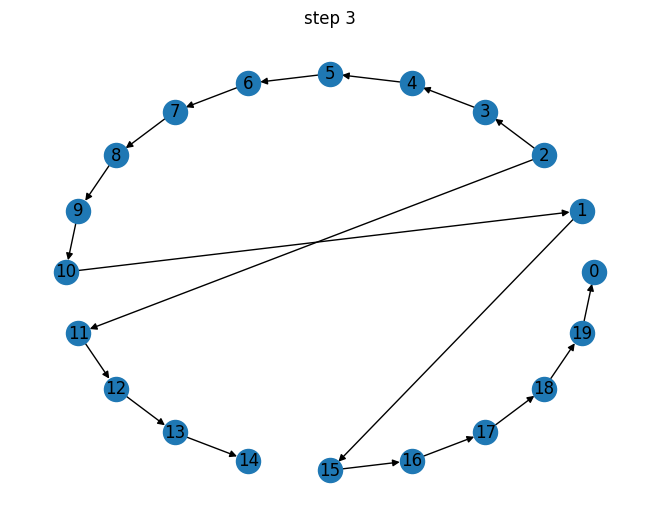

In [75]:
add_edge_and_then_remove_if_necessary(G_temp, prev_predecessor, 1)
prev_predecessor = add_edge_and_then_remove_if_necessary(G_temp, 1, 15)

assert prev_predecessor == 14

draw_graph(G_temp, f'step 3')

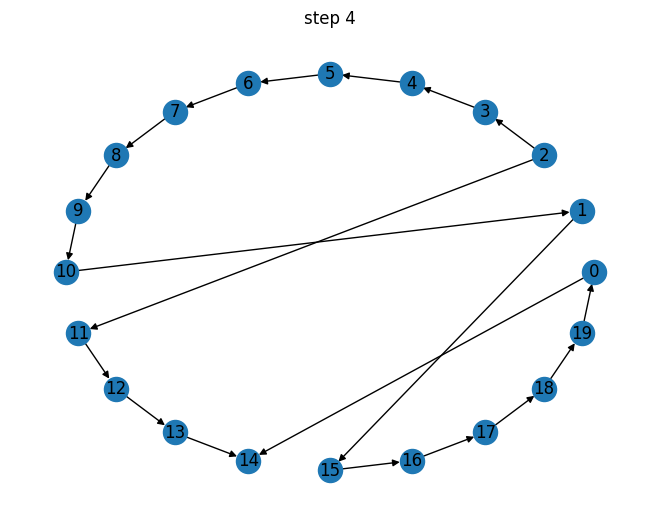

In [76]:
G_temp.add_edge(0, 14)

draw_graph(G_temp, f'step 4')

In [77]:
def rearrange_edges(G):
    start, end = next(iter(G.edges()))
    visited = set([start, end])
    while end != start:
        node = next(G.neighbors(end), None)
        if node != None:
            end = node
            visited.add(node)
        else:
            node = next((n for n in G.predecessors(end) if n not in visited), None)
            assert node != None
            G.remove_edge(node, end)
            G.add_edge(end, node)
            end = node
            visited.add(node)

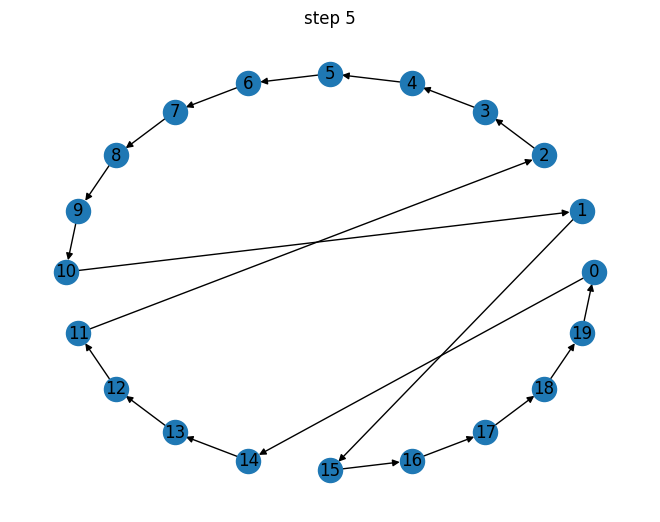

In [78]:
rearrange_edges(G_temp)

draw_graph(G_temp, f'step 5')